In [1]:
# class Tree(object):
#     "Generic tree node."
#     def __init__(self, name='root', children=None):
#         self.name = name
#         self.children = []
#         if children is not None:
#             for child in children:
#                 self.add_child(child)
#     def __repr__(self):
#         return self.name
#     def add_child(self, node):
#         assert isinstance(node, Tree)
#         self.children.append(node)
    
# def show(root):
#         queue= []
#         queue.append(root)
#         while len(queue) > 0 :
#             for i in range(len(queue)):
#                 cur = queue.pop(0)
#                 print(cur.name, end = '  ')
#                 for child in cur.children:
#                     queue.append(child)
#             print('\n******')

        
        
        
#         # cur = root
#         # if cur is not None:
#         #     for child in cur.children:
#         #         show(child)
#         # else:
#         #     return

# #    0
# #   /|\
# #  1 2 3
# #     / \
# #    4   5
# t = Tree('0', [Tree('1'),
#                Tree('2'),
#                Tree('3', [Tree('4'),
#                           Tree('5')])])

In [2]:
# t2 = Tree('0')
# t2.add_child(Tree('1'))
# show(t2)

0  
******
1  
******


In [3]:
import pprint
from collections import defaultdict


class Graph(object):
    """ Graph data structure, undirected by default. """

    def __init__(self, connections, directed=False):
        self._graph = defaultdict(set)
        self._directed = directed
        self.add_connections(connections)

    def add_connections(self, connections):
        """ Add connections (list of tuple pairs) to graph """

        for node1, node2 in connections:
            self.add(node1, node2)

    def add(self, node1, node2):
        """ Add connection between node1 and node2 """

        self._graph[node1].add(node2)
        if not self._directed:
            self._graph[node2].add(node1)

    def remove(self, node):
        """ Remove all references to node """

        for n, cxns in self._graph.items():  # python3: items(); python2: iteritems()
            try:
                cxns.remove(node)
            except KeyError:
                pass
        try:
            del self._graph[node]
        except KeyError:
            pass

    def is_connected(self, node1, node2):
        """ Is node1 directly connected to node2 """

        return node1 in self._graph and node2 in self._graph[node1]

    def find_path(self, node1, node2, path=[]):
        """ Find any path between node1 and node2 (may not be shortest) """

        path = path + [node1]
        if node1 == node2:
            return path
        if node1 not in self._graph:
            return None
        for node in self._graph[node1]:
            if node not in path:
                new_path = self.find_path(node, node2, path)
                if new_path:
                    return new_path
        return None

    def __str__(self):
        return '{}({})'.format(self.__class__.__name__, dict(self._graph))

In [4]:

# g = Graph(connections, directed=False)
# pretty_print = pprint.PrettyPrinter()
# pretty_print.pprint(g._graph)
couplings = [('1','2'),('0','1'),('2','3'),('3','4'),('4','8'),('5','7'),('7','6'),('6','9'),('9','10'),('10','11'),('0','11'),('1','10'),('2','9'),('3','6'),('4','7'),('8','5')]
g = Graph(couplings, directed=False)
pretty_print = pprint.PrettyPrinter()
pretty_print.pprint(g._graph)
print((g._graph))
print(len(g._graph))
arr = []
counter =-1

for r in range(len(g._graph)):
  row = []
  for c in range(len(g._graph)):
    row.append(counter)
  arr.append(row)




defaultdict(<class 'set'>,
            {'0': {'11', '1'},
             '1': {'2', '10', '0'},
             '10': {'9', '11', '1'},
             '11': {'10', '0'},
             '2': {'9', '3', '1'},
             '3': {'2', '4', '6'},
             '4': {'8', '3', '7'},
             '5': {'8', '7'},
             '6': {'9', '3', '7'},
             '7': {'4', '6', '5'},
             '8': {'4', '5'},
             '9': {'10', '6', '2'}})
defaultdict(<class 'set'>, {'1': {'2', '10', '0'}, '2': {'9', '3', '1'}, '0': {'11', '1'}, '3': {'2', '4', '6'}, '4': {'8', '3', '7'}, '8': {'4', '5'}, '5': {'8', '7'}, '7': {'4', '6', '5'}, '6': {'9', '3', '7'}, '9': {'10', '6', '2'}, '10': {'9', '11', '1'}, '11': {'10', '0'}})
12


In [78]:
# from collections import deque
# #using bfs to calculate distance
# def bfs(graph, i, j):
#     dis = 0
#     queue = deque(str(i))
#     while queue:
#         for i in range(len(queue)):

#             cur = queue.popleft()
#             if cur == str(j):
#                 #print("find!!")
#                 return dis
#             else:
#                 for child in graph[cur]:
#                     queue.append(child)
#         dis += 1
# from collections import deque

# def connected_components(graph,mylist):
#     seen = set()
#     # graph = modified(graph,mylist)
#     for root in range(len(graph)):
#         if str(root) not in seen and str(root) in mylist:
#             seen.add(str(root))
#             component = []
#             queue = deque([str(root)])

#             while queue:
#                 node = queue.popleft()
#                 component.append(node)
#                 for neighbor in graph[node]:
#                     if neighbor not in seen and neighbor in mylist:
#                         seen.add(neighbor)
#                         queue.append(neighbor)
#             yield component
# #generating distance matrix
# def distance_matrix(graph,arr):
#     for i in range(len(arr)):
#         for j in range(len(arr)):
#             if i == j :
#                 arr[i][j] = 0
#             else:
#                 arr[i][j] = bfs(graph,i,j)
#     return arr
# # get distance
# def get_distance(dis,component,s,mapping):
#     ans = 100
#     index = 0
#     for j in component:
#         if dis[mapping[int(s)]][mapping[int(j)]] < ans :
#             ans = dis[mapping[int(s)]][mapping[int(j)]]
#             index = j
        
    
#     return ans,index
# def update_component(component,i):
#     for cur in component:
#         if i in cur:
#             cur.remove(i)
#     component[0].append(i)
#     for cur in component:
#         if cur == []:
#             component.remove(cur)
    
# def update_mapping(mapping,i,j):
#     cur = mapping[i]
#     mapping[i] = mapping[j]
#     mapping[j] = cur
#     return
# def back_mapping(mapping,i,j):
#     cur = mapping[i]
#     mapping[i] = mapping[j]
#     mapping[j] = cur
#     return
# def turn_avail(avail,i,j):
#     avail[i] = False
#     avail[j] = False
# # def modifed_path(graph,component,mapping,distancematrix):
# #     biggest = component[0]
# #     for i in range(len(component)-1):
# #         cur = component[i+1]
# #         for j in cur :
# #             print(j)
# #             (dis,index) = get_distance(distancematrix,biggest,j,mapping)
# #             print(f"the new distance now is {dis} from qubit {j} to {index}")
            
# def find_path(graph,component,mapping,distancematrix):
#     biggest = component[0]
#     # avail = [True for i in range(len(mapping))]
#     count = 0
#     while count < 2 and len(component) > 1:
#         print(f"round {count}")
#         avail = [True for i in range(len(mapping))]
#         for i in range(len(component)-1):
#             cur = component[i+1]
#             for j in cur :
#                 print(j)
#                 costlist = []
#                 curdis = get_distance(distancematrix,biggest,j,mapping)
#                 print(f"before swap the distance is {curdis[0]}")
#                 if curdis[0] == 1:
#                     update_component(component,str(j))
#                     print(component)
#                 else:
#                     for k in range(len(avail)):
                        
#                         #if avail[k] and distancematrix[int(j)][int(k)] == 1 and str(k) not in cur:
#                         if avail[k] and distancematrix[int(j)][int(k)] == 1:
#                             temp = []
#                             (pre,n) = get_distance(distancematrix,biggest,j,mapping)
#                             print(f"previous distance is {pre}")
#                             print(f"we can add swap between qubit{j} and qubit{k}")
#                             update_mapping(mapping,int(j),int(k))
#                             print(f"the new mapping is{mapping}")
#                             (ans,index) = (get_distance(distancematrix,biggest,j,mapping))
#                             print(f"the new distance now is {ans} from qubit {j} to {index}")
#                             costdis = ans - pre
#                             print(f"the cost value is {costdis}")
#                             back_mapping(mapping,int(j),int(k))
#                             print("******")
#                             temp.append(k)
#                             temp.append(costdis)
#                             temp.append(ans)
#                             costlist.append(temp)        
#                     print(costlist)
#                     costlist.sort(key = lambda x:x[1])
#                     pick = costlist[0]
#                     #maybe sometimes we do not need to choose if the swap is not good enough
#                     print(f"we will choose swap qubit {j} and qubit {pick[0]} now it has distance{pick[2]}")
#                     update_mapping(mapping,int(j),int(pick[0]))
#                     turn_avail(avail,int(j),int(pick[0]))
#                     print(f"avail qubits are {avail}")
#                     if pick[2] == 1:
#                         print(f"update compoennt with{j}")
#                         update_component(component, str(j))
#                         print(component)
                
#                 #update_component()
#             #print(cur)
#         count += 1
#     print(component)
#     print(len(component))
#     return

In [6]:
print(arr[0][2])
print(bfs(g._graph,0,6))
distancematrix = distance_matrix(g._graph, arr)
print(distancematrix)
print(distancematrix[0][6])
mapping = [i for i in range(len(arr))]
print(mapping)
res = list(connected_components(g._graph,['0','1','2','3','9','5','8']))
print(res[0])
for i in range(len(res)-1):
    cur = res[i+1]
    print(cur)
(ans,index) = (get_distance(distancematrix,res[0],'5',mapping))
print(f"the distance is {ans} from '5' to {index}")
print('***************')
find_path(g._graph,res,mapping,distancematrix)
print(True or False)


-1
4
[[0, 1, 2, 3, 4, 6, 4, 5, 5, 3, 2, 1], [1, 0, 1, 2, 3, 5, 3, 4, 4, 2, 1, 2], [2, 1, 0, 1, 2, 4, 2, 3, 3, 1, 2, 3], [3, 2, 1, 0, 1, 3, 1, 2, 2, 2, 3, 4], [4, 3, 2, 1, 0, 2, 2, 1, 1, 3, 4, 5], [6, 5, 4, 3, 2, 0, 2, 1, 1, 3, 4, 5], [4, 3, 2, 1, 2, 2, 0, 1, 3, 1, 2, 3], [5, 4, 3, 2, 1, 1, 1, 0, 2, 2, 3, 4], [5, 4, 3, 2, 1, 1, 3, 2, 0, 4, 5, 6], [3, 2, 1, 2, 3, 3, 1, 2, 4, 0, 1, 2], [0, 0, 1, 2, 3, 5, 3, 4, 4, 2, 0, 1], [1, 0, 1, 2, 3, 5, 3, 4, 4, 2, 1, 0]]
4
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
['0', '1', '2', '9', '3']
['5', '8']
the distance is 3 from '5' to 9
***************
round 0
5
before swap the distance is 3
previous distance is 3
we can add swap between qubit5 and qubit7
the new mapping is[0, 1, 2, 3, 4, 7, 6, 5, 8, 9, 10, 11]
the new distance now is 2 from qubit 5 to 9
the cost value is -1
******
previous distance is 3
we can add swap between qubit5 and qubit8
the new mapping is[0, 1, 2, 3, 4, 8, 6, 7, 5, 9, 10, 11]
the new distance now is 2 from qubit 5 to 3
the cost val

In [34]:
def modified(graph,mylist):
    intlist = []
    for k in graph:
        temp = []
        if k in mylist:
            for j in graph[k]:
                if j in mylist:
                    temp.append(int(j))
            intlist.append(temp)
    return intlist

In [30]:
queue = deque([Tree('0')])
cur = queue.popleft()
print(type(cur))


<class 'collections.deque'>


In [8]:
print(g._graph[str(1)])

{'10', '0', '2'}


In [13]:
print(res[0])
#findpath(g._graph,res[0],res[len(res)-1])

['0', '1', '2', '3', '6', '4']


In [12]:
# def convert_to_tree(graph, root,mylist,check,mapping):
#     mylist = [str(mapping[int(i)]) for i in myl]
#     #print(mylist)
#     converttree = Tree(root)
#     queue = deque([converttree])
#     while queue:
#         size = len(queue)
#         #print(f"size is {size}")
#         for i in range(size):

#             cur = queue.popleft()
#             # print(f"cur node is {cur.name}")
#             for child in graph[str(cur.name)]:
#                 #print(f"child is {child}")
#                 if check[int(child)] == False and child in mylist:
#                     check[int(child)] = True
#                     temp = Tree(child)
#                     cur.add_child(temp)
#                     queue.append(temp)
#     return converttree


# def backtrack( root,backmap):
#     # queue = deque([root])
#     # while queue:
#     #     size = len(queue)
#     #     print(size)
#     #     for i in range(size):
#     #         cur = queue.popleft()
#     #         cur.name = backmap[int(cur.name)]
#     #         for child in root.children:
#     #             queue.append(child)
#     # return
#     queue= []
#     queue.append(root)
#     while len(queue) > 0 :
#         for i in range(len(queue)):
#             cur = queue.pop(0)
#             # print(cur.name, end = '  ')
#             cur.name = backmap[int(cur.name)]
#             for child in cur.children:
#                 queue.append(child)
#         # print('\n******')

#     # #return converttree
#     # if len(graph[root]) > 0:
#     #     #print('find')
#     #     for child in graph[root]:
#     #         print(f'child number is {child}')
#     #         if int(child) < len(mylist) and check[int(child)]==False and child in mylist:
#     #             check[int(child)] = True
#     #             #print('match')
#     #             converttree.add_child(convert_to_tree(graph,child,mylist,check))
#     # else:
#     #     return converttree
#     # return converttree
# def dfs(root,res):
#     cur = root
    
#     if cur is not None:
#         print(cur.name)
#         res.append(cur.name)
#         #temp.append(cur.name)
#         if len(cur.children) == 0:
#             print("*****")
#             res.append(-1)
#             #temp.clear()
#         for child in cur.children:
#             dfs(child,res)
#     else:
#         #print("****")
#         return
# def transfer_to_list(mapping,graph,root,myl):
#     backmap = [0 for i in range(len(mapping))]
#     check = [False for i in range(len(g._graph))]
#     check[2] = True
#     print(mapping)
#     for i in range(len(mapping)):
#         backmap[int(mapping[i])] = i
#     print(backmap)
#     myt = convert_to_tree(g._graph,'2', myl, check,mapping)
#     #show(myt)
#     backtrack(myt,backmap)
#     show(myt)
#     sumres=[]
#     dfs(myt,sumres)
#     print(sumres)
#     schedule = []
#     split = []
#     for i in range(len(sumres)):
#         if sumres[i] == -1:
#             split.append(i)
#     print(split)
#     startindex=0
#     for i in split:
#         schedule.append(sumres[startindex:i])
#         startindex = i+1
#     for i in range(len(schedule)):
#         if i > 0:
#             schedule[i].insert(0,sumres[0])
#     print(schedule)
#     return schedule

In [21]:
show(myt)

3  
******
4  6  2  
******
1  
******
0  
******


In [22]:
def calculate_depth(mylist):
    mylist.sort()
    for i in range(len(mylist)):
        if i == 0 :
            continue
        else:
            mylist[i] = max(mylist[i],mylist[i-1]+1)
    return mylist

In [23]:
def calculate_depth_value(mylist):
    mylist.sort()
    for i in range(len(mylist)):
        if i == 0 :
            continue
        else:
            mylist[i] = max(mylist[i],mylist[i-1]+1)
    return mylist[len(mylist)-1]

In [93]:
# list = [3,2,2,3]
# print(calculate_depth(list))
# print(calculate_depth_value(list))

NameError: name 'calculate_depth' is not defined

In [25]:
def calculate(root):
    print(root.name)
    
    if root.children:
        listtmp = []
        # for child in root.children:
        #     list.append(calculate(child))
        listtmp =  [calculate(child) for child in root.children]
        print(listtmp)
        ans = calculate_depth_value(listtmp)
        print(ans)
        return ans
    else:
        return 1
        
    

In [26]:
#calculate depth
calculate(t)

0
1
2
3
4
5
[1, 1]
2
[1, 1, 2]
3


3

In [90]:
templist = [1,2,3]
cur = templist[0]
print(cur)
templist[0] = 5
print(templist)

1
[5, 2, 3]


In [18]:
import random
class Tree(object):
    "Generic tree node."
    def __init__(self, name='root', children=None):
        self.name = name
        self.children = []
        if children is not None:
            for child in children:
                self.add_child(child)
    def __repr__(self):
        return self.name
    def add_child(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)
    
def show(root):
        queue= []
        queue.append(root)
        while len(queue) > 0 :
            for i in range(len(queue)):
                cur = queue.pop(0)
                print(cur.name, end = '  ')
                for child in cur.children:
                    queue.append(child)
            print('\n******')
import pprint
from collections import defaultdict


class Graph(object):
    """ Graph data structure, undirected by default. """

    def __init__(self, connections, directed=False):
        self._graph = defaultdict(set)
        self._directed = directed
        self.add_connections(connections)

    def add_connections(self, connections):
        """ Add connections (list of tuple pairs) to graph """

        for node1, node2 in connections:
            self.add(node1, node2)

    def add(self, node1, node2):
        """ Add connection between node1 and node2 """

        self._graph[node1].add(node2)
        if not self._directed:
            self._graph[node2].add(node1)

    def remove(self, node):
        """ Remove all references to node """

        for n, cxns in self._graph.items():  # python3: items(); python2: iteritems()
            try:
                cxns.remove(node)
            except KeyError:
                pass
        try:
            del self._graph[node]
        except KeyError:
            pass

    def is_connected(self, node1, node2):
        """ Is node1 directly connected to node2 """

        return node1 in self._graph and node2 in self._graph[node1]

    def find_path(self, node1, node2, path=[]):
        """ Find any path between node1 and node2 (may not be shortest) """

        path = path + [node1]
        if node1 == node2:
            return path
        if node1 not in self._graph:
            return None
        for node in self._graph[node1]:
            if node not in path:
                new_path = self.find_path(node, node2, path)
                if new_path:
                    return new_path
        return None

    def __str__(self):
        return '{}({})'.format(self.__class__.__name__, dict(self._graph))
from collections import deque
#using bfs to calculate distance
def bfs(graph, i, j):
    dis = 0
    queue = deque(str(i))
    while queue:
        for i in range(len(queue)):

            cur = queue.popleft()
            if cur == str(j):
                #print("find!!")
                return dis
            else:
                for child in graph[cur]:
                    queue.append(child)
        dis += 1
from collections import deque

def connected_components(graph,mylist,mapping):
    for i in range(len(mylist)):
        mylist[i] = str(mapping[int(mylist[i])])
    
    seen = set()
    # graph = modified(graph,mylist)
    for root in range(len(graph)):
        if str(root) not in seen and str(root) in mylist:
            seen.add(str(root))
            component = []
            queue = deque([str(root)])

            while queue:
                node = queue.popleft()
                component.append(node)
                for neighbor in graph[node]:
                    if neighbor not in seen and neighbor in mylist:
                        seen.add(neighbor)
                        queue.append(neighbor)
            yield component
#generating distance matrix
def distance_matrix(graph):
    arr = []
    counter = -1
    for r in range(len(graph)):
        row = []
        for c in range(len(graph)):
            row.append(counter)
        arr.append(row)
    for i in range(len(arr)):
        for j in range(len(arr)):
            if i == j :
                arr[i][j] = 0
            else:
                arr[i][j] = bfs(graph,i,j)
    return arr
# get distance
def get_distance(dis,component,s,mapping):
    ans = 100
    index = 0
    for j in component:
        if dis[mapping[int(s)]][mapping[int(j)]] < ans :
            ans = dis[mapping[int(s)]][mapping[int(j)]]
            index = j
        
    
    return ans,index
def update_component(component,i):
    for cur in component:
        if i in cur:
            cur.remove(i)
    component[0].append(i)
    for cur in component:
        if cur == []:
            component.remove(cur)
    
def update_mapping(mapping,i,j):
    htol = [0 for k in range(len(mapping))]
    for ff in range(len(mapping)):
        htol[int(mapping[ff])] = ff
    print(f"from hardware to logical mapping is {htol}")
    print(f"we swap hardware qubit{i} and qubit{j}")
    left = htol[int(i)]
    right = htol[int(j)]
    cur = mapping[left]
    mapping[left] = mapping[right]
    mapping[right] = cur
    print(f"from logical to hardware mapping is {mapping}")
    return
def back_mapping(mapping,i,j):
    htol = [0 for k in range(len(mapping))]
    for ff in range(len(mapping)):
        htol[int(mapping[ff])] = ff
    print(f"from hardware to logical mapping is {htol}")
    print(f"we swap hardware qubit{i} and qubit{j}")
    left = htol[int(i)]
    right = htol[int(j)]
    cur = mapping[left]
    mapping[left] = mapping[right]
    mapping[right] = cur
    print(f"from logical to hardware mapping is {mapping}")
    return
def turn_avail(avail,i,j):
    avail[i] = False
    avail[j] = False
# def modifed_path(graph,component,mapping,distancematrix):
#     biggest = component[0]
#     for i in range(len(component)-1):
#         cur = component[i+1]
#         for j in cur :
#             print(j)
#             (dis,index) = get_distance(distancematrix,biggest,j,mapping)
#             print(f"the new distance now is {dis} from qubit {j} to {index}")
            
def find_path(graph,component,mapping,distancematrix):
    
    biggest = component[0]
    swapres = []
    # avail = [True for i in range(len(mapping))]
    print(f"current mapping is {mapping}")
    count = 0
    while count < 10 and len(component) > 1:
        print(f"round {count}")
        avail = [True for i in range(len(mapping))]
        # print(f"debug with {component}")
        # print(f"debug with length should be {len(component)}")
        # print(f"debug with{ range(len(component)-1)}")
        for curi in component[1:]:
            #len(component)
            # print(i+1)
            # print(f"debug with length should be {len(component)}")
            # print(f"debug with{ range(len(component)-1)}")
            # print(f"debug with {i}")
            cur = curi
            for j in cur :
                print(f"logical qubit{j}")
                physicalj = mapping[int(j)]
                print(f"hardware qubit{physicalj}")
                costlist = []
                curdis = get_distance(distancematrix,biggest,j,mapping)
                print(f"before swap the distance is {curdis[0]}")
                if curdis[0] == 1:
                    update_component(component,str(j))
                    print(component)
                else:
                    for k in range(len(avail)):
                        
                        #if avail[k] and distancematrix[int(j)][int(k)] == 1 and str(k) not in cur:
                        if avail[k] and distancematrix[physicalj][int(k)] == 1 and k not in cur:
                            temp = []
                            (pre,n) = get_distance(distancematrix,biggest,j,mapping)
                            print(f"previous distance is {pre}")
                            print(f"we can add swap between physical qubit {mapping[int(j)]}  and physical qubit{k}  ")
                            update_mapping(mapping,physicalj,int(k))
                            # print(f"the new mapping is{mapping}")
                            (ans,index) = (get_distance(distancematrix,biggest,j,mapping))
                            print(f"the new distance now is {ans}")
                            costdis = ans - pre
                            print(f"the cost value is {costdis}")
                            back_mapping(mapping,physicalj,int(k))
                            print("******")
                            temp.append(k)
                            temp.append(costdis)
                            temp.append(ans)
                            costlist.append(temp)        
                    print(costlist)
                    
                    costlist.sort(key = lambda x:x[1])
                    if len(costlist) < 1 or costlist[0][1] > -1 :
                        print(f"all the swaps are not usefull, skip to next qubit")
                    else :

                        for c in costlist:
                            if c[2] == 1:
                                print(f"we can merget to biggest component if we swap qubit {physicalj} and qubit {c[0]}  now it has distance{c[2]}")
                        
                        print(f"debug with costlist{costlist}")
                        pick = costlist[0]
                        #maybe sometimes we do not need to choose if the swap is not good enough if cost function is all >0 we do not need to choose
                        print(f"current mapping is {mapping}")
                        
                        print(f"we will choose swap qubit {physicalj} and qubit {pick[0]}  now it has distance{pick[2]}")
                        update_mapping(mapping,physicalj,int(pick[0]))
                        turn_avail(avail,physicalj,int(pick[0]))
                        print(f"after swap the mapping is {mapping}")
                        tempres = []
                        tempres.append(physicalj)
                        tempres.append(pick[0])
                        swapres.append(tempres)
                        if pick[2] == 1:
                            print(f"update compoennt with{j}")
                            update_component(component, str(j))
                            print(component)
                #update_component()
            #print(cur)
        count += 1
    print(component)
    print(len(component))
    return swapres
def convert_to_tree(graph, root,myl,check,mapping):
    mylist = [str(mapping[int(i)]) for i in myl]
    #print(mylist)
    converttree = Tree(root)
    queue = deque([converttree])
    while queue:
        size = len(queue)
        #print(f"size is {size}")
        for i in range(size):

            cur = queue.popleft()
            # print(f"cur node is {cur.name}")
            for child in graph[str(cur.name)]:
                #print(f"child is {child}")
                if check[int(child)] == False and child in mylist:
                    check[int(child)] = True
                    temp = Tree(child)
                    cur.add_child(temp)
                    queue.append(temp)
    return converttree


def backtrack( root,backmap):
    # queue = deque([root])
    # while queue:
    #     size = len(queue)
    #     print(size)
    #     for i in range(size):
    #         cur = queue.popleft()
    #         cur.name = backmap[int(cur.name)]
    #         for child in root.children:
    #             queue.append(child)
    # return
    queue= []
    queue.append(root)
    while len(queue) > 0 :
        for i in range(len(queue)):
            cur = queue.pop(0)
            # print(cur.name, end = '  ')
            cur.name = backmap[int(cur.name)]
            for child in cur.children:
                queue.append(child)
        # print('\n******')

    # #return converttree
    # if len(graph[root]) > 0:
    #     #print('find')
    #     for child in graph[root]:
    #         print(f'child number is {child}')
    #         if int(child) < len(mylist) and check[int(child)]==False and child in mylist:
    #             check[int(child)] = True
    #             #print('match')
    #             converttree.add_child(convert_to_tree(graph,child,mylist,check))
    # else:
    #     return converttree
    # return converttree
import operator
def dfs(root,res):
    cur = root
    
    if cur is not None:
        print(cur.name)
        res.append(cur.name)
        #temp.append(cur.name)
        if len(cur.children) == 0:
            print("*****")
            res.append(-1)
            #temp.clear()
        for child in cur.children:
            dfs(child,res)
    else:
        #print("****")
        return
def get_root(graph,myl,mapping,distancematrix):
    res = [mapping[int(i)] for i in myl]
    print(res)
    dic ={}
    for i in res:
        print(i)
        count = 0
        for j in graph[str(i)]:
            if int(j) in res:
                count += 1
        dic[i] = count
    
    res = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
    # print(type(dic))
    # print(type(res))
    # print(type(res))
    max = res[0][1]
    candidate = []
    print(max)
    for i in res:
        if i[1] == max:
            candidate.append(i[0])
    print(f"all candiates are {candidate}")
    center = {}
    if len(candidate) == 1:
        print("only one candiate return")
        return candidate[0]
    else:
        for i in candidate:
            center[i] = get_mid(i,candidate,distancematrix)
        print(center)
        cenres = sorted(center.items(), key=operator.itemgetter(1))
        print(cenres)
        # print(cenres[0][0])
        return cenres[0][0]
def get_root_random(graph,myl,mapping,distancematrix):
    res = [mapping[int(i)] for i in myl]
    print(f"result list is{res}")
    randomchoice = random.choice(res)
    print(randomchoice)
    return randomchoice
    # dic ={}
    # for i in res:
    #     print(i)
    #     count = 0
    #     for j in graph[str(i)]:
    #         if int(j) in res:
    #             count += 1
    #     dic[i] = count
    
    # res = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
    # # print(type(dic))
    # # print(type(res))
    # # print(type(res))
    # max = res[0][1]
    # candidate = []
    # print(max)
    # for i in res:
    #     if i[1] == max:
    #         candidate.append(i[0])
    # print(f"all candiates are {candidate}")
    # center = {}
    # if len(candidate) == 1:
    #     print("only one candiate return")
    #     return candidate[0]
    # else:
    #     for i in candidate:
    #         center[i] = get_mid(i,candidate,distancematrix)
    #     print(center)
    #     cenres = sorted(center.items(), key=operator.itemgetter(1))
    #     print(cenres)
    #     # print(cenres[0][0])
    #     return cenres[0][0]        
def get_mid(index,res,distancematrix):
    sum = 0
    #print(res)
    for i in res:
        
        
        sum += distancematrix[int(i)][int(index)]
    return sum


def transfer_to_list(mapping,graph,root,myl):

    # backmap = [0 for i in range(len(mapping))]
    check = [False for i in range(len(graph))]
    
    check[int(root)] = True
    print(mapping)
    # for i in range(len(mapping)):
    #     backmap[int(mapping[i])] = i
    # print(backmap)
    # print(f"the tree list are{myl}")
    myt = convert_to_tree(graph,str(root), myl, check,mapping)
    #show(myt)
    # backtrack(myt,backmap)
    show(myt)
    sumres=[]
    dfs(myt,sumres)
    print(sumres)
    schedule = []
    split = []
    for i in range(len(sumres)):
        if sumres[i] == -1:
            split.append(i)
    print(split)
    startindex=0
    for i in split:
        schedule.append(sumres[startindex:i])
        startindex = i+1
    for i in range(len(schedule)):
        if i > 0:
            schedule[i].insert(0,sumres[0])
    print(schedule)
    for i in schedule:
        i = i.reverse()
    return schedule
def transfer_to_qasm(swap,schedule,graph):
    # f = open("/Users/feihua/pythonfile/VQE/schedule.qasm", "w+")
    f = open("schedule3.qasm", "w+")
    pre = ["OPENQASM 2.0;\n","include \"qelib1.inc\";\n",f"qreg q[{len(graph)}];\n"]
    f.writelines(pre)
    size = len(swap)
    swapcount = 0
    gatecount = 0
    depthcount = 0
    for i in range(len(swap)):
        swapcur = swap[i]
        swapcount += len(swapcur)
        curgatecount = 0
        curdepthmax = 0
        for k in swapcur:
            f.write(f"swap q[{int(k[0])}], q[{int(k[1])}];\n")
        writelist = []
        schedulecur = schedule[i]
        for tt in range(len(schedulecur)):
            cur = schedulecur[tt]
            curmax = 0
            curdepthmax = max(curdepthmax,len(schedulecur[tt]))
            for j in range(len(cur)):
                if j < len(cur)-1:
                    writelist.append(f"cx q[{int(cur[j])}],q[{int(cur[j+1])}];\n")
                    print(f"cx q[{int(cur[j])}],q[{int(cur[j+1])}];")
                    curgatecount += 1
                    #f.write(f"cx q[{int(cur[j])}],q[{int(cur[j+1])}];\n")
        
        f.writelines(writelist)
        f.write(f"rz(pi/2) q[{schedulecur[0][0]}];\n")
        curgatecount = curgatecount*2+1
        print(writelist)
        print(len(writelist))
        for d in reversed(writelist):
            f.write(d)
        gatecount += curgatecount
        depthcount += (curdepthmax-1)*2+1
    f.close()   
    print(f"the total swaps are {swapcount} and the total cx gates are {gatecount} the total depths are {depthcount}")
    return
def generate_string(pauli):
    generate = []
    count = -1
    for p in pauli:
        for c in p:
            count += 1
            if c == 'I':
                continue
            else:
                generate.append(str(count))
            
    return generate
    

In [117]:
# get_root(g._graph,['0','1','2','3','5','8','9'],mapping)
cl = []
cl.sort(key=lambda x:x[1])
print(cl)
if len(cl) < 1 or cl[0][1] > -1 :
    print(f"all the swap are not helpful at all {cl}")

[]
all the swap are not helpful at all []


In [39]:

# couplings = [('1','2'),('0','1'),('2','3'),('3','4'),('4','8'),('5','7'),('7','6'),('6','9'),('9','10'),('10','11'),('0','11'),('1','10'),('2','9'),('3','6'),('4','7'),('8','5')]
# g = Graph(couplings, directed=False)
# distancematrix = distance_matrix(g._graph)
# print(distancematrix)
# mapping = [i for i in range(len(distancematrix))]
# # print(mapping)
# res = list(connected_components(g._graph,['0','1','2','3','9','5','8']))
# print(res[0])
# for i in range(len(res)-1):
#     cur = res[i+1]
#     print(cur)
  
# (ans,index) = (get_distance(distancematrix,res[0],'5',mapping))
# print(f"the distance is {ans} from '5' to {index}")
# print('***************')
# swap = find_path(g._graph,res,mapping,distancematrix)
# print(swap)
# print(mapping)
# print(res[0])
# myl = res[0]
# root = get_root(g._graph,myl,mapping)
# schedule = transfer_to_list(mapping,g._graph,str(root),myl)
# print(swap)
# transfer_to_qasm(swap,schedule,g._graph)
# print(schedule)


In [15]:
import pdb
def VQE(pauli, couplingname):
    couplingsum={}
    couplingsum['Melborune'] = [('1','2'),('0','1'),('2','3'),('3','4'),('4','8'),('5','7'),('7','6'),('6','9'),('9','10'),('10','11'),('0','11'),('1','10'),('2','9'),('3','6'),('4','7'),('8','5')]
    ccp= [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14,  11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]
    for i in ccp:
        for k in range(len(i)):
            i[k] = str(i[k])
    couplingsum['Montreal'] = ccp
    #print(ccp)
    g = Graph(couplingsum[couplingname], directed=False)
    distancematrix = distance_matrix(g._graph)
    print(distancematrix)
    mapping = [i for i in range(len(distancematrix))]
    round = 0
    swapsum = []
    schedulesum = []
    for p in pauli:
        print("")
        print(f"**************start round {round}***********")
        print("")
        print(f"original pauli is{p}")
        generatelist = generate_string(p)
        if generatelist == []:
            print("emptylist found, move to next layer")
            round += 1
            continue
        print(f"original list is{generatelist}")
        res = list(connected_components(g._graph,generatelist,mapping))
        res.sort(key=lambda x:len(x))
        res.reverse()
        if len(res) <= 1:
            print(f"we only have one biggest component {res} ")
        else:
            print(res)
            print(f"the biggest component in hardware is {res[0]}")
            # pdb.set_trace()
            for i in range(len(res)-1):
                cur = res[i+1]
                print(f"other components in hardware are {cur} ")
        #from hardware to logical
        print("turn in to logical qubits")
        htol = [0 for i in range(len(mapping))]
        for i in range(len(mapping)):
            htol[int(mapping[i])] = i
        print(f"from hardware to logical mapping is {htol}")

        for i in range(len(res)):
            cur = res[i]
            for j in range(len(cur)):
                cur[j] = str(htol[int(cur[j])])
        print(f"the logical qubits component is {res}")

        # (ans,index) = (get_distance(distancematrix,res[0],'5',mapping))
        # print(f"the distance is {ans} from '5' to {index}")
        # print('***************')
        if len(res) > 1:
            swap = find_path(g._graph,res,mapping,distancematrix)
            swapsum.append(swap)
            print(swap)
        else :
            swapsum.append([])
        print(mapping)
        print(f"the biggest component is {res[0]}")
        myl = res[0]
        root = get_root(g._graph,myl,mapping,distancematrix)
        print(f"the root is {root}")
        schedule = transfer_to_list(mapping,g._graph,str(root),myl)
        schedulesum.append(schedule)
        # transfer_to_qasm(swap,schedule,g._graph)
        print(schedule)
        round += 1
    print(f"the total swap are {swapsum}")
    print(len(swapsum))
    for s in swapsum:
        print(f"the swaps are{s}")
    print(f"the total schedule are {schedulesum}")
    for s in schedulesum:
        print(f"the schedule are{s}")
    transfer_to_qasm(swapsum,schedulesum,g._graph)
def generate_pauli_txt(filename): 
    tempresult = []
    pauliresult = []
    lines = []
    with open(filename) as f:
        lines = f.readlines()

    count = 0
    for line in lines:
        temp = line.split('*')
        tempresult.append(temp[1].strip(' '))
    for p in tempresult:
        pauliresult.append(p.rstrip())
    # print(pauliresult)   
    return pauliresult
def VQE_linear(pauli, couplingname):
    couplingsum={}
    couplingsum['Melborune'] = [('1','2'),('0','1'),('2','3'),('3','4'),('4','8'),('5','7'),('7','6'),('6','9'),('9','10'),('10','11'),('0','11'),('1','10'),('2','9'),('3','6'),('4','7'),('8','5')]
    ccp= [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14,  11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]
    for i in ccp:
        for k in range(len(i)):
            i[k] = str(i[k])
    couplingsum['Montreal'] = ccp
    g = Graph(couplingsum[couplingname], directed=False)
    distancematrix = distance_matrix(g._graph)
    print(distancematrix)
    cxnumber = 0
    depth = 0
    swapnumber = 0
    for p in pauli:
        print(p)
        curcx = 0
        curswap = 0
        cindex = 0
        preindex = -1

        for k in range(len(p)):
            
            if p[k] != "I":
                cindex = k
                if preindex != -1 and cindex - preindex > 1:
                    curswap += cindex-preindex-1
                preindex = k
                if curswap > 0:
                    print(f"find swap number is {curswap}")
                print(p[k])
                curcx = curcx + 1

        print(f"cureent layer cx number is{curcx}")
        cxnumber += curcx*2 + curswap*3*2
        swapnumber += curswap*2
        depth += curcx*2+1
    print(f"total cx number is{cxnumber}")
    print(f"total depths are{depth}")
def VQE_baseline(pauli, couplingname):
    couplingsum={}
    couplingsum['Melborune'] = [('1','2'),('0','1'),('2','3'),('3','4'),('4','8'),('5','7'),('7','6'),('6','9'),('9','10'),('10','11'),('0','11'),('1','10'),('2','9'),('3','6'),('4','7'),('8','5')]
    ccp= [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14,  11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]
    for i in ccp:
        for k in range(len(i)):
            i[k] = str(i[k])
    couplingsum['Montreal'] = ccp
    #print(ccp)
    g = Graph(couplingsum[couplingname], directed=False)
    distancematrix = distance_matrix(g._graph)
    print(distancematrix)
    mapping = [i for i in range(len(distancematrix))]
    round = 0
    swapsum = []
    schedulesum = []
    for p in pauli:
        print("")
        print(f"**************start round {round}***********")
        print("")
        print(f"original pauli is{p}")
        generatelist = generate_string(p)
        if generatelist == []:
            print("emptylist found, move to next layer")
            round += 1
            continue
        print(f"original list is{generatelist}")
        res = list(connected_components(g._graph,generatelist,mapping))
        res.sort(key=lambda x:len(x))
        res.reverse()
        if len(res) <= 1:
            print(f"we only have one biggest component {res} ")
        else:
            print(res)
            print(f"the biggest component in hardware is {res[0]}")
            # pdb.set_trace()
            for i in range(len(res)-1):
                cur = res[i+1]
                print(f"other components in hardware are {cur} ")
        #from hardware to logical
        print("turn in to logical qubits")
        htol = [0 for i in range(len(mapping))]
        for i in range(len(mapping)):
            htol[int(mapping[i])] = i
        print(f"from hardware to logical mapping is {htol}")

        for i in range(len(res)):
            cur = res[i]
            for j in range(len(cur)):
                cur[j] = str(htol[int(cur[j])])
        print(f"the logical qubits component is {res}")

        # (ans,index) = (get_distance(distancematrix,res[0],'5',mapping))
        # print(f"the distance is {ans} from '5' to {index}")
        # print('***************')
        if len(res) > 1:
            swap = find_path(g._graph,res,mapping,distancematrix)
            swapsum.append(swap)
            print(swap)
        else :
            swapsum.append([])
        print(mapping)
        print(f"the biggest component is {res[0]}")
        myl = res[0]
        root = get_root_random(g._graph,myl,mapping,distancematrix)
        print(f"the root is {root}")
        schedule = transfer_to_list(mapping,g._graph,str(root),myl)
        schedulesum.append(schedule)
        # transfer_to_qasm(swap,schedule,g._graph)
        print(schedule)
        round += 1
    print(f"the total swap are {swapsum}")
    print(len(swapsum))
    for s in swapsum:
        print(f"the swaps are{s}")
    print(f"the total schedule are {schedulesum}")
    for s in schedulesum:
        print(f"the schedule are{s}")
    transfer_to_qasm(swapsum,schedulesum,g._graph)
    

In [5]:
dict_sto3g = {'-0.8470288010133715 ': ' IIII', '- 0.16071249108067318 ': ' ZIII', '+ 0.14907478844731492 ': ' IIIZ', '+ 0.11162723403394154 ': ' IIZZ', '- 0.1607124910806732 ': ' IIZI', '+ 0.1673712594830412 ': ' ZIZI', '+ 0.15927015747375775 ': ' ZIIZ', '+ 0.1611381637816487 ': ' IZIZ', '+ 0.047642923439816236 ': ' YYYY'}
print(dict_sto3g.values())
inputlist = list(dict_sto3g.values())

inputstring = [x.strip(' ') for x in inputlist]
print(inputstring)

dict_values([' IIII', ' ZIII', ' IIIZ', ' IIZZ', ' IIZI', ' ZIZI', ' ZIIZ', ' IZIZ', ' YYYY'])
['IIII', 'ZIII', 'IIIZ', 'IIZZ', 'IIZI', 'ZIZI', 'ZIIZ', 'IZIZ', 'YYYY']


In [20]:
pauli = ['XXYXIYIIXZ','XXZYIIIZII'] # 01237
pauli2 = ['XXYXIYIIXZ']
pauli3 = ['XYZZZYIIIX']#0123459
pauli4 = ['IIII','ZIII','ZIIZ','YYYY']
pauli5 = generate_pauli_txt('pauli.txt')
couplingname = 'Melborune'
couplilarge = 'Montreal'
#VQE(inputstring,couplilarge)
#print(pauli5)
#VQE_linear(pauli5,couplilarge)
#VQE(pauli5,couplilarge)
VQE_baseline(pauli5,couplilarge)


[[0, 1, 2, 3, 2, 4, 4, 3, 5, 6, 4, 6, 5, 6, 7, 6, 8, 8, 7, 9, 10, 8, 10, 9, 10, 11, 12], [1, 0, 1, 2, 1, 3, 3, 2, 4, 5, 3, 5, 4, 5, 6, 5, 7, 7, 6, 8, 9, 7, 9, 8, 9, 10, 11], [2, 1, 0, 1, 2, 2, 4, 3, 3, 4, 4, 4, 5, 6, 5, 6, 6, 8, 7, 7, 8, 8, 8, 9, 10, 9, 10], [3, 2, 1, 0, 3, 1, 5, 4, 2, 3, 5, 3, 6, 5, 4, 7, 5, 9, 8, 6, 7, 9, 7, 10, 9, 8, 9], [2, 1, 2, 3, 0, 4, 2, 1, 5, 6, 2, 6, 3, 4, 5, 4, 6, 6, 5, 7, 8, 6, 8, 7, 8, 9, 10], [4, 3, 2, 1, 4, 0, 6, 5, 1, 2, 6, 2, 5, 4, 3, 6, 4, 8, 7, 5, 6, 8, 6, 9, 8, 7, 8], [4, 3, 4, 5, 2, 6, 0, 1, 7, 8, 2, 6, 3, 4, 5, 4, 6, 6, 5, 7, 8, 6, 8, 7, 8, 9, 10], [3, 2, 3, 4, 1, 5, 1, 0, 6, 7, 1, 5, 2, 3, 4, 3, 5, 5, 4, 6, 7, 5, 7, 6, 7, 8, 9], [5, 4, 3, 2, 5, 1, 7, 6, 0, 1, 5, 1, 4, 3, 2, 5, 3, 7, 6, 4, 5, 7, 5, 8, 7, 6, 7], [6, 5, 4, 3, 6, 2, 8, 7, 1, 0, 6, 2, 5, 4, 3, 6, 4, 8, 7, 5, 6, 8, 6, 9, 8, 7, 8], [0, 0, 1, 2, 1, 3, 3, 2, 4, 5, 0, 5, 4, 5, 6, 5, 7, 7, 6, 8, 9, 7, 9, 8, 9, 10, 11], [1, 0, 1, 2, 1, 3, 3, 2, 4, 5, 3, 0, 4, 5, 6, 5, 7, 7, 6, 8, 9, 7, 9, 8,

ibmqfactory.load_account:WARNING:2022-03-17 14:00:57,961: Credentials are already in use. The existing account in the session will be replaced.


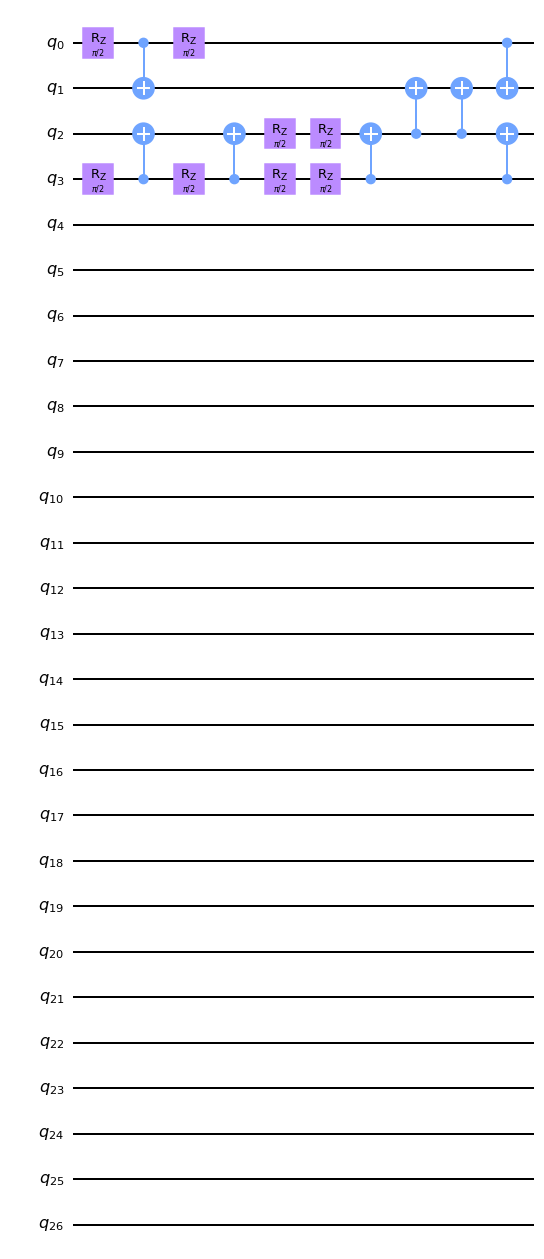

In [130]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-pnnl', group='internal', project='default')
provider.backends()
backend = provider.get_backend('ibmq_montreal')
simbackend = provider.get_backend('ibmq_qasm_simulator')
qc = QuantumCircuit.from_qasm_file('schedule2.qasm')
qc.draw(output='mpl')



In [129]:
print(qc.depth())

1721


In [131]:
from qiskit import QuantumCircuit, Aer, execute
job = execute(qc, backend)
result = job.result()
print(result.get_counts())